# Task 2: Exploratory Data Analysis (EDA)

In this task, we will perform exploratory data analysis (EDA) on the dataset to better understand its structure and characteristics. This includes data overview, summary statistics, visualizing distributions, correlation analysis, handling missing values, and detecting outliers.

## 1. Overview of the Data

In this section, we will load the dataset and examine its structure, including the number of rows, columns, and data types.

In [5]:
# Importing necessary libraries
import os
import pandas as pd

os.chdir(r'c:\Users\ermias.tadesse\10x\BatiBank_CreditRisk_Model\Data')
# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Number of rows and columns: {data.shape}")
print("\nColumn names and data types:")
# print(data.dtypes)
# Display the structure of the dataset
data.info()

Number of rows and columns: (95662, 16)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  

### Load variable definitions

In [7]:
variable_definitions = pd.read_csv('Xente_Variable_Definitions.csv')
# Display variable definitions
print("\nVariable definitions:")
variable_definitions


Variable definitions:


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


### Display the first few rows of the dataset

In [9]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


The code above loads the dataset and gives a basic overview of its structure, including the number of rows, columns, and data types. This helps us understand the dataset's size and the types of data we are working with.

---

## 2. Summary Statistics

Next, we will generate summary statistics to understand the central tendency, dispersion, and shape of the dataset’s numerical features.


In [10]:
# Displaying summary statistics for numerical columns
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


The summary statistics provide essential details such as the mean, standard deviation, minimum, and maximum values for each numerical column. These give us an idea of the spread and distribution of the data.

---

## 3. Distribution of Numerical Features

To gain further insights, we will visualize the distribution of the numerical features such as `Amount` and `Value`. This helps us identify patterns, skewness, or potential outliers in the dataset.


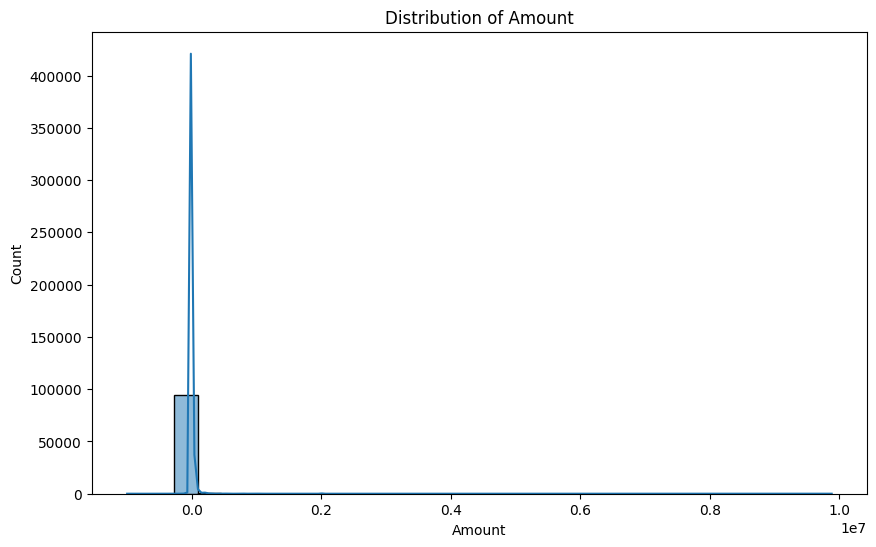

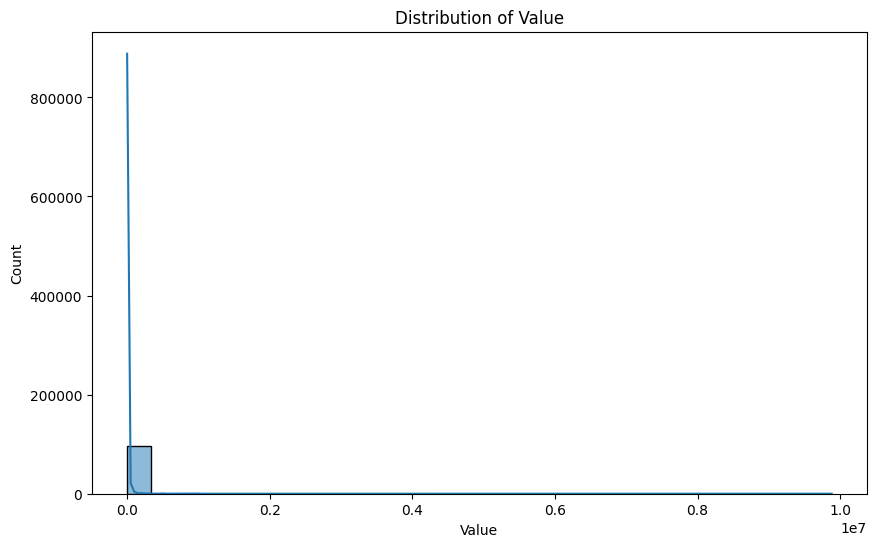

In [11]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['Amount', 'Value']

# Plotting histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


The histograms allow us to visualize the distribution of the selected numerical features. The use of kernel density estimation (KDE) gives us a smoother representation of the feature's distribution, helping to identify any skewness or outliers.

---

## 4. Distribution of Categorical Features

We will now analyze the distribution of key categorical features such as `ProductCategory`, `ChannelId`, and `FraudResult` to understand the frequency and variability of the categories.


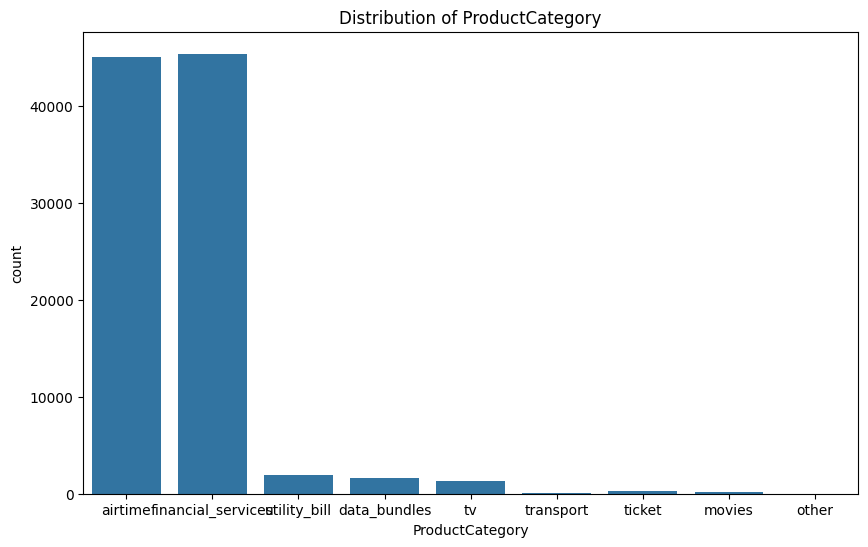

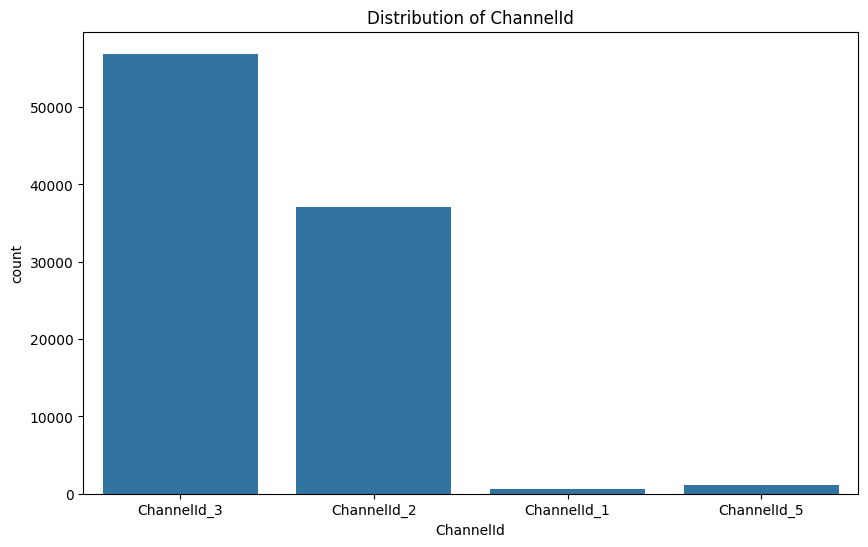

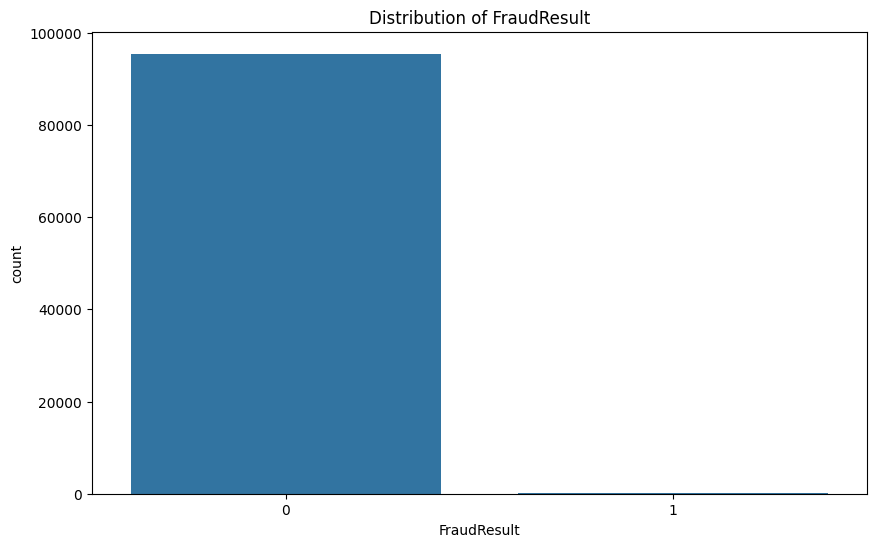

In [12]:
# List of categorical features
categorical_features = ['ProductCategory', 'ChannelId', 'FraudResult']

# Plotting count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


The count plots show the frequency of occurrences for each category in the categorical features. This helps us understand the distribution and variability of different product categories, transaction channels, and the occurrence of fraud cases.

---

## 5. Correlation Analysis

Next, we will look at the correlations between numerical features. This helps in identifying relationships between variables that may be useful later during feature engineering and modeling.


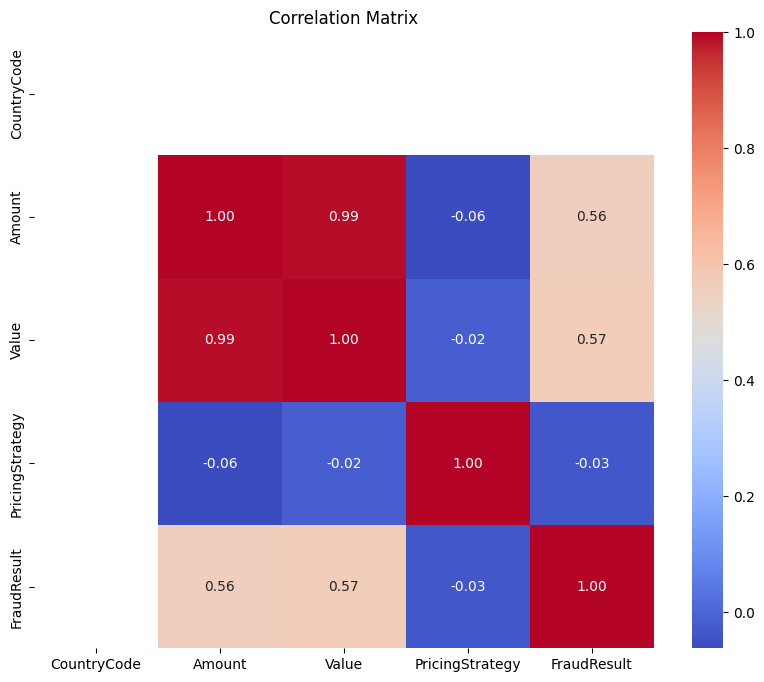

In [14]:

#Correlation Analysis
# Select only numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Generating a correlation matrix
# correlation_matrix = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix visually represents the relationships between numerical features. Higher correlation values (closer to 1 or -1) indicate stronger relationships between features, which could influence future model-building decisions.

---

## 6. Identifying Missing Values

It’s important to identify missing data to decide on appropriate imputation strategies. We will examine which columns have missing values and how much data is missing.


In [15]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


The code checks for missing values in each column of the dataset. This will help us understand whether we need to apply strategies like imputation or removal of rows/columns with missing data.

---

## 7. Outlier Detection

Lastly, we will detect outliers in the dataset using box plots for the numerical features. Outliers are extreme values that may impact model performance and need to be addressed during preprocessing.


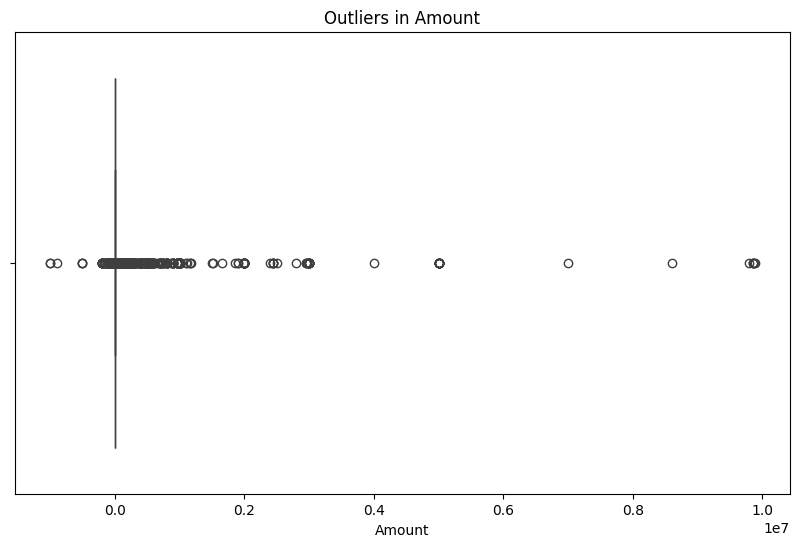

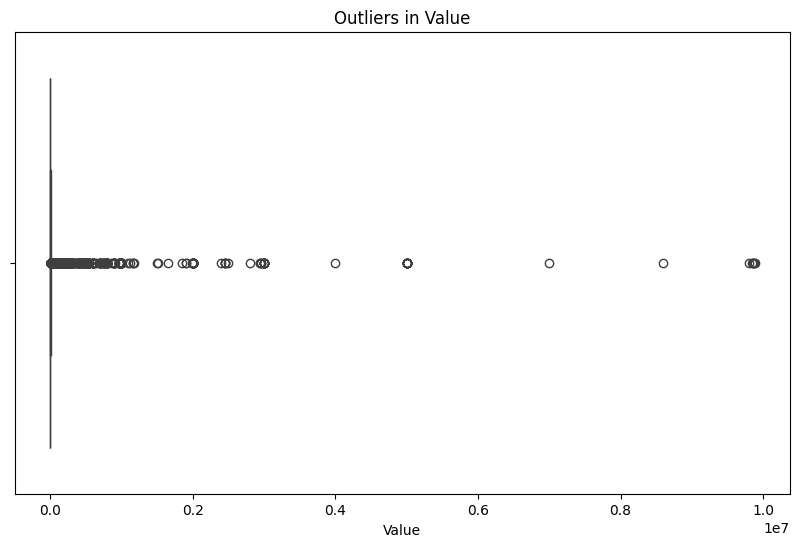

In [16]:
# Plotting box plots to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()


Box plots help identify outliers in the numerical features. Outliers can significantly affect model performance, so detecting them is crucial to decide how to handle them during preprocessing.

---

With this EDA, we have gained a better understanding of the dataset. In the next steps, we can focus on feature engineering and model building based on these insights.


In [17]:
# Exploratory Data Analysis (EDA)
# Distribution of the target variable (FraudResult)
fraud_distribution = data['FraudResult'].value_counts(normalize=True)
print("\nFraudResult distribution:")
print(fraud_distribution)


FraudResult distribution:
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


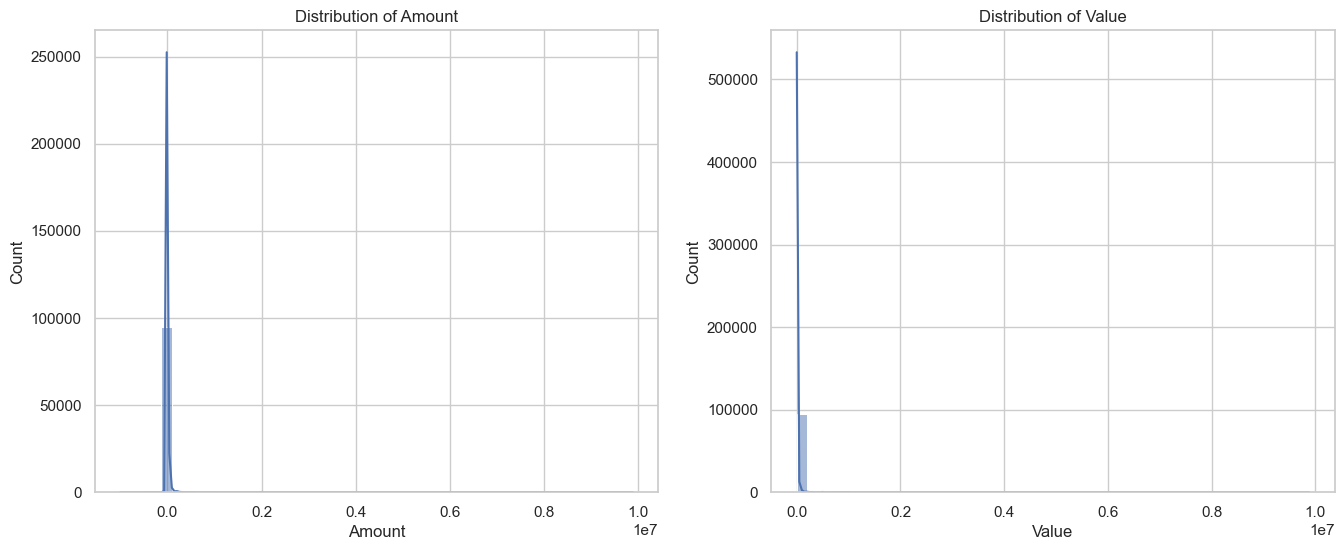

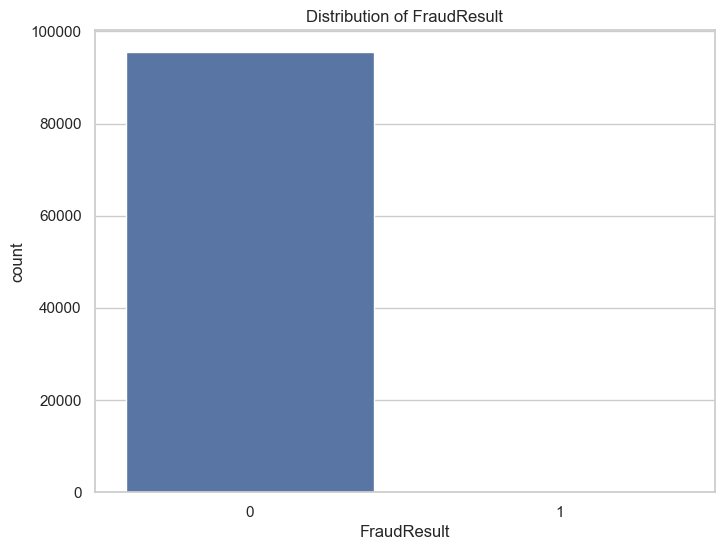

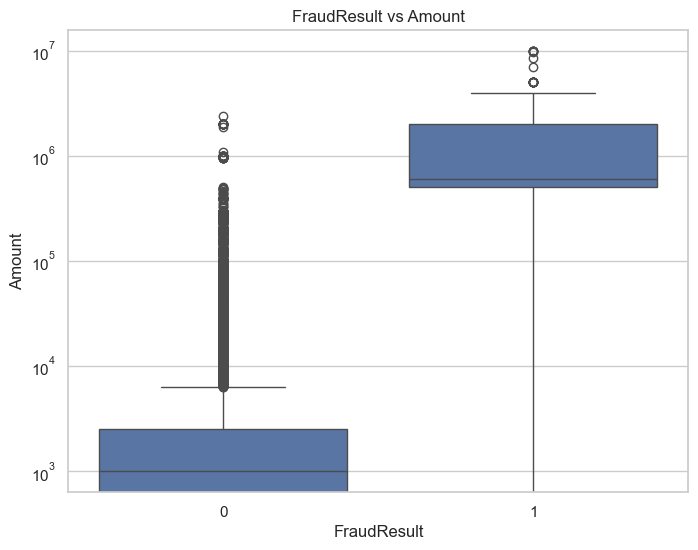

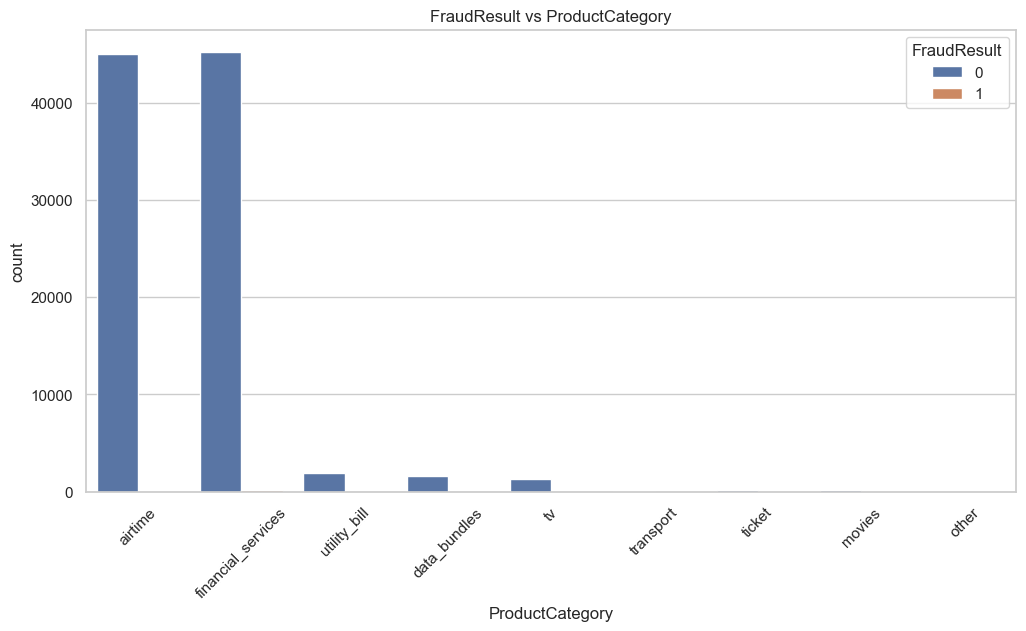

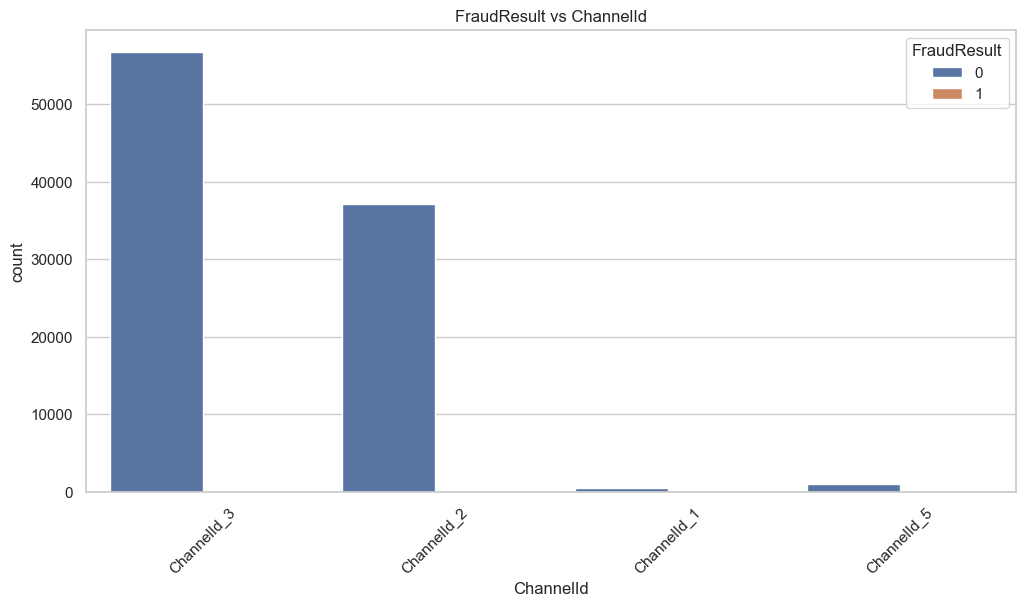

In [20]:
# Define proxy variable for risk
data['Risk'] = data['FraudResult'].apply(lambda x: 'High' if x == 1 else 'Low')

# Set the style for the plots
sns.set(style="whitegrid")

# Plot distribution of Amount and Value
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Amount')
sns.histplot(data['Value'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Value')

plt.show()

# Plot FraudResult distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudResult', data=data)
plt.title('Distribution of FraudResult')
plt.show()

# Plot FraudResult vs Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudResult', y='Amount', data=data)
plt.title('FraudResult vs Amount')
plt.yscale('log')  # Use log scale due to the wide range of Amount values
plt.show()

# Plot FraudResult vs ProductCategory
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductCategory', hue='FraudResult', data=data)
plt.title('FraudResult vs ProductCategory')
plt.xticks(rotation=45)
plt.show()

# Plot FraudResult vs ChannelId
plt.figure(figsize=(12, 6))
sns.countplot(x='ChannelId', hue='FraudResult', data=data)
plt.title('FraudResult vs ChannelId')
plt.xticks(rotation=45)
plt.show()